# 1. What is a Perceptron

Perceptron is a mathematical model. It is also an algorithm just like an SVM. They can be used for Supervised ML problems.

Perceptron is the building block of Deep Learning and Artificial Neural Networks.

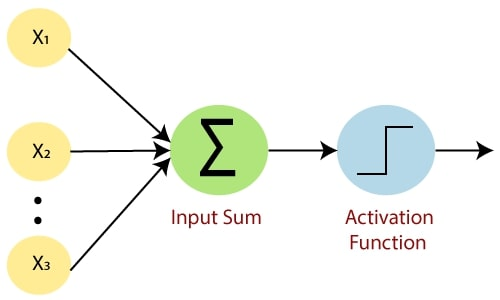

In [1]:
# Single-Layer Perceptron

from IPython import display
display.Image("data/images/DL_02_Perceptrons-01-Single-Layer-Perceptron.jpg")

We have two steps
1. Training -> Find the optimum values for weights and bias
2. Prediction -> Use these optimum values on an unseen input and get prediction